In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, pickle

In [2]:
from utils.latticeeasy import *
from utils.gmon import get_mass
from utils.visualisation_utils import get_opacity

In [3]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 9})
rc('text', usetex=True)
rc('image', cmap='gist_heat_r')
rc('axes', **{'titlesize': 10})

plt.rcParams['axes.axisbelow'] = True

from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid

# Save dir

In [4]:
save_dir = "images_for_paper"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Load data

Skip to a few cells ahead...

Okay, now you can run.

In [5]:
output_dir_list = [
    "data/collision 1",
    "data/collision 2",
    "data/collision 3",
]

timeslices_list = [
    [250.804626, 336.406433, 376.689636],
    [4.99982, 265.910828, 499.999542],
    [145.061218, 346.477234, 499.999542]
]

In [6]:
Edens_mean_list = []

for output_dir in output_dir_list:
    
    Edens_mean_list.append(load_energy(output_dir,4)[1:].sum()) # 4 is the timeslice which corresponds to the ~250t_pr time from the primary simulation.

In [7]:
Edens_list = [[pickle.load(open(os.path.join(output_dir,f'edens_slice_{times}.p'),'rb')) for times in timeslices_list[i]] for i, output_dir in enumerate(output_dir_list)]

In [8]:
vmax_list = [np.array(Edens_list[i]).max()/Edens_mean_list[i] for i in range(len(Edens_list))]

In [9]:
L_list = [3.43749956, 3.43749956, 3.43749956] # All 3 simulations happen to have the same width bc I made them so.

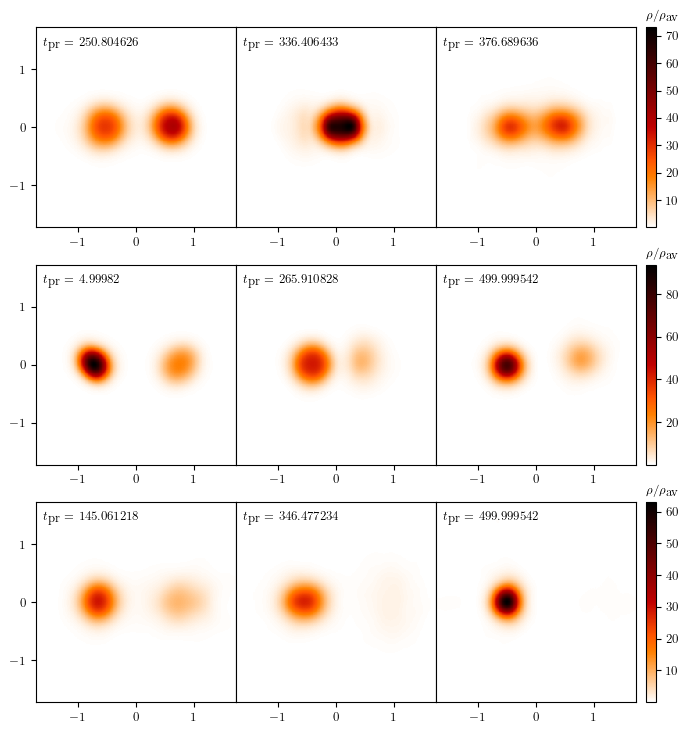

In [10]:
fig = plt.figure(figsize=(8,8.4))

subfigs = fig.subfigures(3, 1, hspace=-0.35)

for i in range(3):
    
    grid = ImageGrid(subfigs[i], 111,
                 
                 nrows_ncols = (1,3),
                 axes_pad = 0,
                 cbar_location = "right",
                 cbar_mode="edge",
                 cbar_size=.1,
                 cbar_pad=0.1,
                )

    L = L_list[i]
    domain_grid = np.linspace(0,L,256)
    
    for j in range(3):
        
        ax = grid[j]
    
        mesh = ax.pcolormesh(domain_grid-L/2,domain_grid-L/2,Edens_list[i][j].T/Edens_mean_list[i],vmax=vmax_list[i])
        ax.set_aspect(1)
        if j>0:
            ax.get_yaxis().set_visible(False)
        
        ax.text(L/32-L/2,L*14.5/16-L/2,r"$t_{\textrm{pr}}$ = "+f'{timeslices_list[i][j]}')
        # ax.set_ylim(L/8-L/2,L*7/8-L/2) # reduce the plot height...

        ax.set_yticks([-1,0,1])
        
    cbar = fig.colorbar(mesh, cax=grid.cbar_axes[0])
    
    cbar.ax.set_title(r"$\rho/\rho_{\textrm{av}}$",loc="left",fontsize=9)
    
# plt.savefig(os.path.join(save_dir,f"merger and bouncer.png"),dpi=400,facecolor='w',bbox_inches='tight')
# plt.savefig(os.path.join(save_dir,f"Collisions.png"),dpi=400,facecolor='w',bbox_inches='tight')
plt.show()

In [31]:
output_dir_list = [
    # "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.05_25_695.675659/trial_2/smash_osc7_128_osc7_128_0.02",
    "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.05_25_695.675659/trial_2/smash_osc7_128_osc7_128_0.02_flip",
]

output_pardir_list = [os.path.join('/',*os.path.join(*output_dir.split('/')[:6])[::-1].replace('_','/',1)[::-1].split('/')[:-1]) for output_dir in output_dir_list]

In [32]:
output_pardir_list

['/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.05_25']

In [33]:
plot_timeslices = [
    # [2,390,415],
    [1,135,253],
    
    # [0,390,415],
    # [0,135,253],
]

for i, output_dir in enumerate(output_dir_list):
    data = LATTICEEASY(output_dir)
    print(data.t[plot_timeslices[i]])

[  10.000412  678.641479 1499.999878]


In [34]:
Edens_mean_list = []

for output_dir, output_pardir in zip(output_dir_list,output_pardir_list):
    
    data_par = LATTICEEASY(output_pardir)

    idx = len([1 for s,t in zip(output_pardir, output_dir) if s==t])
    t_pr = float(output_dir[idx+1:].split('/')[0])
    timeslice, = np.where(data_par.t==t_pr)[0]
    Edens_mean_list.append(load_energy(output_pardir,timeslice)[1:].sum())

In [35]:
Edens_mean_list

[np.float64(0.054175074999999996)]

In [36]:
Edens_list = []

for i, output_dir in enumerate(output_dir_list):
    data = LATTICEEASY(output_dir)
    
    Edens_list.append([])
    
    for j in range(len(plot_timeslices[i])):
        
        Edens_dir = os.path.join(output_dir,f"edens_slice_{data.t[plot_timeslices[i][j]]}.p")
        
        if os.path.exists(Edens_dir):
#         if 1:
            print("load")
            Edens = pickle.load(open(Edens_dir,'rb'))
            if Edens.ndim == 3:
                print('redumping...')
                pickle.dump(Edens[:,128],open(Edens_dir,'wb'))                
            Edens_list[-1].append(pickle.load(open(Edens_dir,'rb')))
        else:
            print("save")
            Edens = data.get_Edens_pr(plot_timeslices[i][j])
            Edens_list[-1].append(Edens)
            pickle.dump(Edens[:,128,:],open(Edens_dir,'wb'))

load
load
load


In [37]:
vmax_list = [np.array(Edens).max() for Edens in Edens_list] 
vmax_list[0]/Edens_mean_list[0]

np.float64(109.72887345140781)

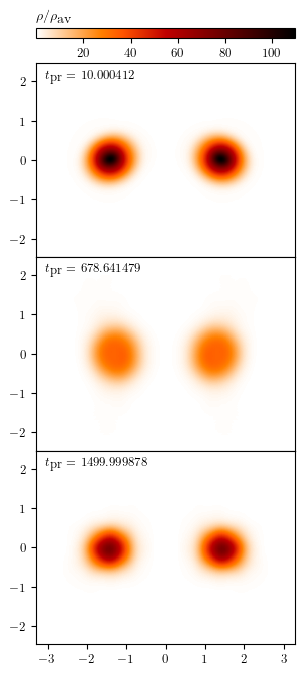

In [38]:
fig = plt.figure(figsize=(3.5,8))
# fig.tight_layout()

subfigs = fig.subfigures(1, 1,)

# subfigs[0].set_facecolor('c')
# subfigs[1].set_facecolor('m')
# subfigs[2].set_facecolor('c')

for i in range(1):

    # subfigs[i].set_facecolor((1.0, 0.0, 0.0, 0))

    data = LATTICEEASY(output_dir_list[i])

    domain_width = np.array(data.domain_width_pr)/data.rescale_B*get_mass(data.alpha,data.beta)
    L = domain_width[0]
    domain_grid = np.linspace(0,L,data.domain_dimensions[0])
    
    grid = ImageGrid(subfigs, 111,
                     nrows_ncols = (3,1),
                     axes_pad = 0,
                     cbar_location = "top",
                     cbar_mode="edge",
                     cbar_size=.1,
                     cbar_pad=0.25,
                )
    grid.cbar_axes
    
    for j in range(3):
        
        ax = grid[j]
    
        mesh = ax.pcolormesh(domain_grid-L/2,domain_grid-L/2,Edens_list[i][j].T/Edens_mean_list[i],vmax=vmax_list[i]/Edens_mean_list[i])
        ax.set_aspect(1)
        ax.get_xaxis().set_ticks(np.arange(-3,4,1))
        ax.get_yaxis().set_visible(True)
        # ax.get_yaxis().set_ticks([])
        ax.text(L/32-L/2,L*13/16-L/2,r"$t_{\textrm{pr}}$ = "+f'{data.t[plot_timeslices[i][j]]}')
        ax.set_ylim(L/8-L/2,L*7/8-L/2)
        
        # if j==0:
        #     if i==0:
        #         ax.set_ylabel('(a)',rotation=0,labelpad=10)
        #     if i==1:
        #         ax.set_ylabel('(b)',rotation=0,labelpad=10)
        #     if i==2:
        #         ax.set_ylabel('(c)',rotation=0,labelpad=10)
        
    cbar = fig.colorbar(mesh, cax=grid.cbar_axes[0], orientation='horizontal')
    cbar.ax.set_title(r"$\rho/\rho_{\textrm{av}}$", loc='left')
    
plt.savefig(os.path.join(save_dir,f"bounce.png"),dpi=400,facecolor='w',bbox_inches='tight')
plt.show()

# Load data

In [11]:
from utils.gradient_utils import gradient_discrete

In [12]:
output_dir = "/media/yangelaxue/23E7CCB1624D2A50/Colliding_Oscillons/alpha_beta-0.5_50_250.804626/trial_2/smash_osc2_128_osc3_128_0.02"
data = LATTICEEASY(output_dir)

In [13]:
# data.t[55]
# data.t[63]
data.t[60]

np.float64(361.583435)

In [14]:
phi_pr = load_phi(output_dir,data.domain_dimensions,56)
Edens_pr = data.get_Edens_pr(56)

In [15]:
phi_pr_grad = gradient_discrete(phi_pr,data.domain_width_pr/data.domain_dimensions,)
Edens_pr_grad = gradient_discrete(Edens_pr,data.domain_width_pr/data.domain_dimensions,)

In [16]:
L = (data.domain_width_pr/data.rescale_B*get_mass(data.alpha,data.beta))[0]

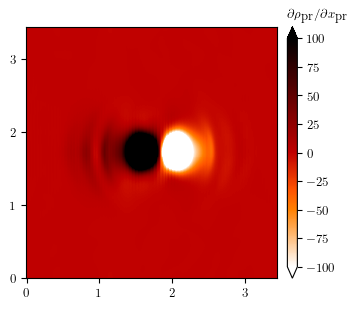

In [24]:
fig, ax = plt.subplots(1,1,figsize=(3.5,6))

mesh = ax.pcolormesh(np.linspace(0,L,data.domain_dimensions[0]), np.linspace(0,L,data.domain_dimensions[0]), Edens_pr_grad[0][:,128].T,
                    vmax=100,vmin=-100,
                     # vmax=2
)
# mesh = ax.pcolormesh(np.linspace(0,L,data.domain_dimensions[0]), np.linspace(0,L,data.domain_dimensions[0]), phi_pr_grad[0][:,128].T)
ax.set_aspect('equal')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=.1, pad=0.1)
cbar = fig.colorbar(mesh,cax=cax, extend='both')
# cbar.ax.set_title(r"$\partial\phi_{\textrm{pr}}/\partial x_{\textrm{pr}}$",loc='left',fontsize=9)
cbar.ax.set_title(r"$\partial\rho_{\textrm{pr}}/\partial x_{\textrm{pr}}$",loc='left',fontsize=9)
# cbar.ax.set_title(r"$\rho_{\textrm{pr}}$",loc='left',fontsize=9)
# cbar.ax.set_title(r"$\$",loc='left')

ax.set_xticks([0,1,2,3])
ax.set_yticks([0,1,2,3])

plt.savefig(os.path.join(save_dir,f"waves.png"),dpi=400,facecolor='w',bbox_inches='tight')
plt.show()